## DataSet 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("archive/data.csv")

df = df.drop(columns=["date", "country", "street"])

df["was_renovated"] = (df["yr_renovated"] > 0).astype(int)


df["sqft_sum"] = df["sqft_above"] + df["sqft_basement"]
df["sqft_diff"] = df["sqft_living"] - df["sqft_sum"]
df["sqft_diff_pct"] = np.abs(df["sqft_diff"]) / df["sqft_living"]


print("Consistency between sqft_living and sqft_above+sqft_basement:")
print(df["sqft_diff_pct"].describe())

inconsistentes = df[df["sqft_diff_pct"] > 0.05]
print(f"\nRows with unconsistency >5%: {len(inconsistentes)}")
display(inconsistentes[["sqft_living", "sqft_above", "sqft_basement", "sqft_sum", "sqft_diff"]].head())

Consistency between sqft_living and sqft_above+sqft_basement:
count    4600.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: sqft_diff_pct, dtype: float64

Rows with unconsistency >5%: 0


,sqft_living,sqft_above,sqft_basement,sqft_sum,sqft_diff


In [17]:
df = df.drop(columns=["sqft_diff_pct", "sqft_sum", "sqft_diff"])

In [18]:
df["log_price"] = np.log(df["price"])
display(df[["price","log_price"]].head())

/Users/toni/Documents/MESIIA/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,price,log_price
0,313000.0,12.653958
1,2384000.0,14.684290
2,342000.0,12.742566
3,420000.0,12.948010
4,550000.0,13.217674


In [19]:
invalid_prices = df[(df["price"] <= 0) | (df["price"].isna())]
print(f"Rows with price <= 0 o NaN: {len(invalid_prices)}")

if len(invalid_prices) > 0:
    display(invalid_prices[["price"]].head())

df = df[df["price"] > 0].copy()

df["log_price"] = np.log(df["price"])

Rows with price <= 0 o NaN: 49


,price
4354,0.0
4356,0.0
4357,0.0
4358,0.0
4361,0.0


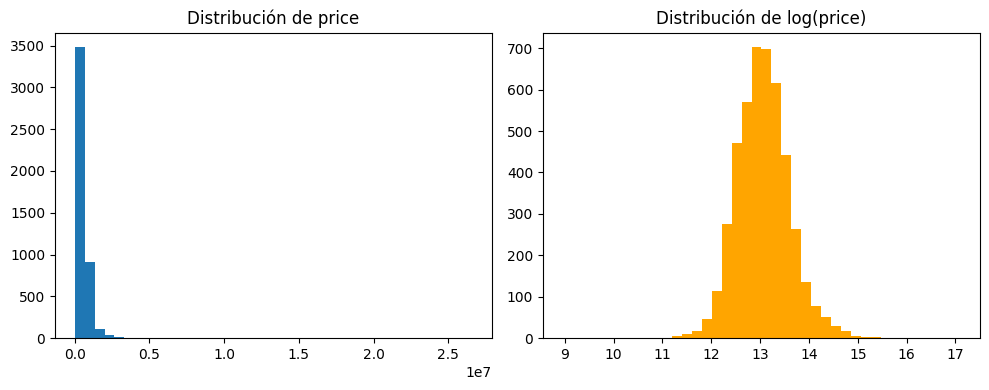

In [20]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df["price"], bins=40)
plt.title("Distribución de price")

plt.subplot(1,2,2)
plt.hist(df["log_price"], bins=40, color='orange')
plt.title("Distribución de log(price)")

plt.tight_layout()
plt.show()


In [21]:
print(df.head())

       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0       3.0       1.50         1340      7912     1.5           0   
1  2384000.0       5.0       2.50         3650      9050     2.0           0   
2   342000.0       3.0       2.00         1930     11947     1.0           0   
3   420000.0       3.0       2.25         2000      8030     1.0           0   
4   550000.0       4.0       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3        1340              0      1955          2005   
1     4          5        3370            280      1921             0   
2     0          4        1930              0      1966             0   
3     0          4        1000           1000      1963             0   
4     0          4        1140            800      1976          1992   

        city  statezip  was_renovated  log_price  
0  Shoreline  WA 98133       